In [1]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as st1
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy.special import gamma
from scipy.special import beta
import statsmodels.api as sm
import seaborn as sns
import pylab

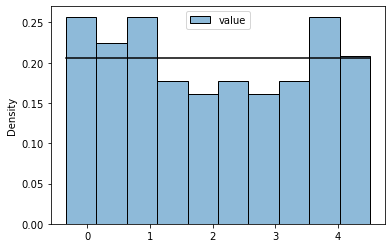

In [124]:
data1 = np.loadtxt("5.txt")
data = pd.DataFrame(data1, columns= ["value"])
x = np.linspace(min(data.value), max(data.value), 1000)
sns.histplot(data, bins = 10, kde = False, stat = "density")


def uniform_dist(a, b):
    '''
    Считаем формулу плотности равномерного распределения 
    '''
    return 1/(b-a)
plt.plot(x, uniform_dist(min(data.value), max(data.value))+x*0, color = "black", label = "Равномерное")
None

In [125]:
def generate_table_hist(data):
    n_groups = 1+math.floor(math.log(len(data), 2))
    h = abs(max(data)-min(data))/n_groups
    low = np.arange(min(data), max(data), h)
    upp = np.arange(min(data)+h, max(data)+h, h+0.000001)
    med = (low + upp)/2
    table_cut = pd.DataFrame({'values':data, 'groups':pd.cut(data, n_groups)})
    table_hist = table_cut.groupby('groups').count()
    table_hist['abs_freq'] = table_hist['values']
    table_hist['p'] = table_hist['abs_freq'] / len(data)
    table_hist['low'] = low
    table_hist['upp'] = upp
    table_hist['med'] = med
    return table_hist

# **Нормальное распределение**

In [126]:
def normal_dist(upper, MU, SD):
    h = 0.01
    arrx = np.arange(-1000, upper, 0.01)
    arry = norm.pdf(arrx, mu_sample, sd_sample)
    s = 0
    for num in range(len(arrx)):
        s += abs(h * arry[num])
    return s

In [127]:
def generate_norm(data, n):
    new_data = np.empty(n)
    for i in range(n):
        new_data[i] = np.random.choice(data, 20).mean()
    return new_data
data_n = generate_norm(data.value, 100)
data_n

array([1.87315501, 1.98370967, 1.72508949, 2.0578534 , 1.66960957,
       1.96004018, 2.22442367, 1.6480061 , 2.45475371, 1.79784167,
       1.58610792, 1.84309642, 2.17222822, 1.92381386, 2.17938313,
       2.12970786, 1.23129286, 2.09946107, 1.53629272, 2.48012809,
       1.71032238, 2.74920788, 2.17070728, 2.16086508, 2.15636802,
       2.19383288, 2.08326982, 2.10744783, 2.60073218, 1.41071196,
       2.06716445, 1.21536652, 1.62162196, 1.60272246, 1.73226317,
       2.44493904, 2.49713564, 1.43815772, 1.86166489, 1.70071912,
       1.93523565, 1.61824366, 1.88819595, 2.02512638, 2.03524931,
       2.07851333, 1.7592723 , 2.5620595 , 2.09552568, 1.79928954,
       2.07819487, 2.10169857, 1.57452567, 1.94523199, 2.88044312,
       2.29456157, 1.90980532, 1.93221611, 2.16040478, 2.19087217,
       2.39531214, 1.75789537, 1.73202644, 2.71274552, 1.99735362,
       1.9201149 , 2.10418135, 2.3876479 , 2.12657492, 1.64503228,
       1.95659069, 1.98325933, 1.6542451 , 2.111801  , 2.33258

## В строке где у заменил "normal_dist" на функцию из scipy "norm.pdf"

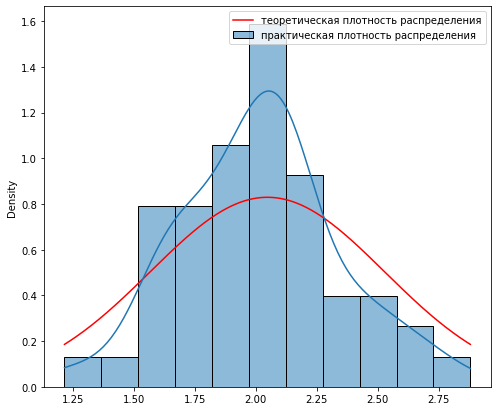

In [128]:
x = np.linspace(min(data_n), max(data_n), 1000)
y = norm.pdf(x, x.mean(), x.std())
plt.figure(figsize= (8, 7))
plt.plot(x, y, c = "red", label = "теоретическая плотность распределения")
plt.legend()
sns.histplot(data_n, stat = "density", kde = True, label = "практическая плотность распределения")
plt.legend()
None 


<Figure size 1440x648 with 0 Axes>

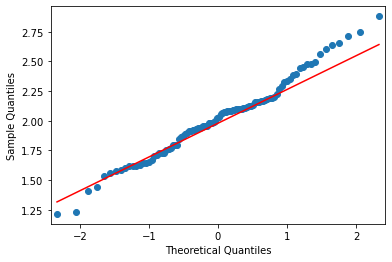

In [129]:
plt.figure(figsize= (20, 9))
sm.qqplot(data_n, line= "q")
pylab.show()

In [131]:
n_groups = 1+math.floor(math.log(len(data_n), 2))
table_hist2 = generate_table_hist(data_n)


def normal_dist(x, mu, q):
    return (1/(q*(2*np.pi)**0.5))*np.exp(-((x-mu)**2)/(2*q**2))


def integrate_norm(upper, Mu, Sd):
    lower = -1000
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = normal_dist(arrx, Mu, Sd)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S


def chisq_test_norm(table_hist_n, mean, sd):
    N = sum(table_hist_n.abs_freq)
    pract = table_hist_n.abs_freq
    theor = np.empty(table_hist_n.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_norm(table_hist_n.upp.iloc[i], mean, sd) - integrate_norm(table_hist_n.low.iloc[i], mean, sd))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Normal dist -",chisq_test_norm(table_hist2, data_n.mean(),data_n.std())<st1.chi2.ppf(0.95, n_groups-2-1))

Normal dist - True


# **Chi^2 распределение**

In [132]:
def generate_chisq(data_N, k):
    new_data = np.empty(len(data))
    Z = np.zeros((k, 30))
    for i in range(k):
        L = np.random.choice(data_N, 30)
        Z[i] =  (L - L.mean())/L.std()
    return sum(Z**2)
k = 30
data_chisq = generate_chisq(data_n, k)
def chisq_dist(x, n):
    return (1/2)**(n/2)/gamma(n/2)*x**(n/2-1)*np.exp(-x/2)
generate_chisq(data_n, k)

array([31.38375673, 25.95941354, 25.41617558, 27.64171933, 32.68044183,
       23.18939458, 26.01265427, 37.83635099, 23.32914132, 33.6444109 ,
       31.22916367, 49.81492746, 35.3959361 , 31.88277881, 24.83856004,
       29.81903346, 32.13401956, 29.86109179, 26.92108945, 23.43839251,
       35.10746323, 35.13359378, 29.40899187, 31.41795046, 27.2222197 ,
       26.21865946, 39.52462508, 26.02145119, 24.45163926, 23.06495404])

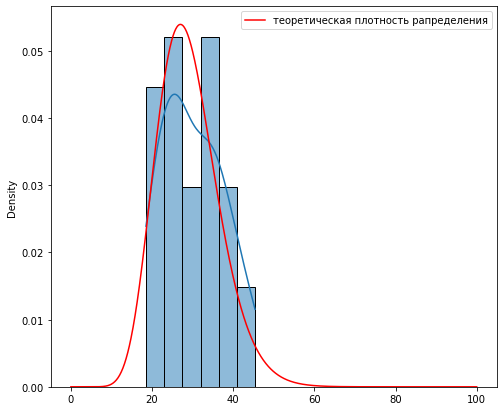

In [133]:
x = np.linspace(0, 100, 1000)
y_chi_teor = chisq_dist(x, k-1)
plt.figure(figsize= (8, 7))
sns.histplot(data_chisq, stat = "density", kde = True)
plt.plot(x, y_chi_teor, label = "теоретическая плотность рапределения", c = "red")
plt.legend()
None

In [135]:
table_hist3 = generate_table_hist(data_chisq)
def integrate_chisq(upper, k1):
    lower = 0
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = chisq_dist(arrx, k1)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S

def chisq_test_chisq(table_hist_chi, k1):
    N = sum(table_hist_chi.abs_freq)
    pract = table_hist_chi.abs_freq
    theor = np.empty(table_hist_chi.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_chisq(table_hist_chi.upp.iloc[i], k1) - integrate_chisq(table_hist_chi.low.iloc[i], k1))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Chisq dist -",chisq_test_chisq(table_hist3, k) < st1.chi2.ppf(0.95, n_groups-3))

Chisq dist - True


# **Распределение Фишера**

In [136]:
def generate_fisher(data_n, k1, k2):
    chisq_dist1 = generate_chisq(data_n, k1)
    chisq_dist2 = generate_chisq(data_n, k2)
    fisher_dist = (chisq_dist1/k1)/(chisq_dist2/k2)
    return fisher_dist
def fisher_dist(x, n, m):
    return gamma((n+m)/2)/(gamma(n/2)*gamma(m/2))*(n**(n/2)*m**(m/2)*x**(n/2-1))/((n*x+m)**((n+m)/2))
k1, k2, = 30, 20
fisher_d = generate_fisher(data_n, k1, k2)

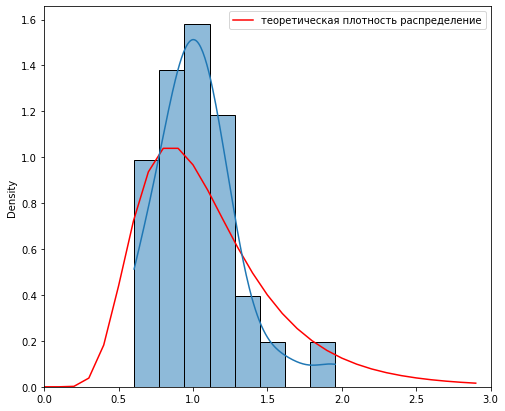

In [137]:
bi = np.arange(0, 3, 0.125)
xf = np.arange(0, 3, 0.1)
yf = fisher_dist(xf, k1, k2)
plt.figure(figsize= (8, 7))
plt.plot(xf, yf, c = "red", label = "теоретическая плотность распределение")
sns.histplot(fisher_d, stat = "density", kde = True)
plt.legend()
plt.xlim(0, 3)
None

In [139]:
table_hist4 = generate_table_hist(fisher_d)
def integrate_fisher(upper, k1, k2):
    lower = 0
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = fisher_dist(arrx, k1, k2)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S
def chisq_test_fisher(table_hist_fi, k1, k2):
    N = sum(table_hist_fi.abs_freq)
    pract = table_hist_fi.abs_freq
    theor = np.empty(table_hist_fi.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_fisher(table_hist_fi.upp.iloc[i], k1, k2) - integrate_fisher(table_hist_fi.low.iloc[i], k1, k2))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Fisher dist -",chisq_test_fisher(table_hist4, k1, k2) < st1.chi2.ppf(0.95, n_groups-3))

Fisher dist - True


# **Распределения Стьюдента**

In [140]:
def generate_student(data, n):
    Y0 = generate_norm(data, 100)
    Yn = np.zeros(100)
    for i in range (n):
        Yn += ((generate_norm(data, 100))**2)**0.5
    return Y0/((1/n*Yn))


def generate_student_not_true(n):
    Y0 = np.random.normal(0, 1, 100)
    Yn = np.zeros(100)
    for i in range (n):
        Yn += ((np.random.normal(0, 1, 100))**2)**0.5
    return Y0/((1/n*Yn))


def student_dist(x, n):
    return 1/(n**0.5*beta(1/2, n/2))*(1+x**2/n)**((-n+1)/2)
n = 14
student_d = generate_student_not_true(n)

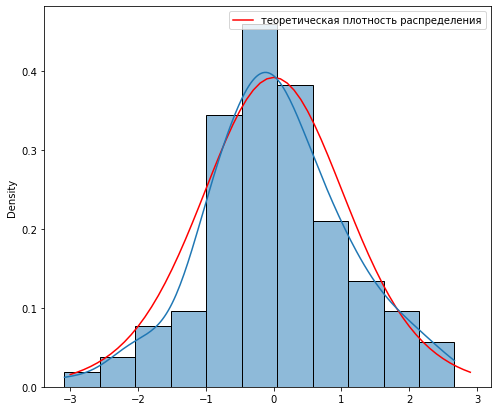

In [141]:
xs = np.arange(-3, 3, 0.1)
ys = student_dist(xs, n)
plt.figure(figsize= (8, 7))
plt.plot(xs, ys, c="red", label = "теоретическая плотность распределения")
sns.histplot(student_d, stat = "density", kde = True)
plt.legend()
None

In [142]:
table_hist5 = generate_table_hist(student_d)
def integrate_student(upper, n):
    lower = -1000
    h = 0.01
    arrx = np.arange(lower, upper, h)
    arry = student_dist(arrx, n)
    S = 0
    for i in range (len(arrx)):
        S+= abs(h*arry[i])
    return S


def chisq_test_student(table_hist_st, n):
    N = sum(table_hist_st.abs_freq)
    pract = table_hist_st.abs_freq
    theor = np.empty(table_hist_st.shape[0])
    for i in range (len(theor)):
        theor[i] = N * (integrate_student(table_hist_st.upp.iloc[i], n) - integrate_student(table_hist_st.low.iloc[i], n))
    chisq_d = sum((pract-theor)**2/theor)
    return chisq_d
print( "Student dist -",chisq_test_student(table_hist5, n) < st1.chi2.ppf(0.95, n_groups - 2))

Student dist - True
